In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import collections

In [0]:
import nltk

In [0]:
from nltk.corpus import stopwords

In [0]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [0]:
from sklearn.model_selection import train_test_split

In [0]:
pd.options.display.max_columns = None

In [0]:
!pip install -U -q PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

In [0]:
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
data = drive.CreateFile({'id': '1vlsxkBv77KjITNMHQOYkKq-T_ZReI-3w'})
data.GetContentFile('News_Category_Dataset.json')


In [0]:
dataset =pd.read_json('News_Category_Dataset.json', lines=True)

In [0]:
dataset.shape

(124989, 6)

In [0]:
dataset.head()

,authors,category,date,headline,link,short_description
0,Melissa Jeltsen,CRIME,2018-05-26,There Were 2 Mass Shootings In Texas Last Week...,https://www.huffingtonpost.com/entry/texas-ama...,She left her husband. He killed their children...
1,Andy McDonald,ENTERTAINMENT,2018-05-26,Will Smith Joins Diplo And Nicky Jam For The 2...,https://www.huffingtonpost.com/entry/will-smit...,Of course it has a song.
2,Ron Dicker,ENTERTAINMENT,2018-05-26,Hugh Grant Marries For The First Time At Age 57,https://www.huffingtonpost.com/entry/hugh-gran...,The actor and his longtime girlfriend Anna Ebe...
3,Ron Dicker,ENTERTAINMENT,2018-05-26,Jim Carrey Blasts 'Castrato' Adam Schiff And D...,https://www.huffingtonpost.com/entry/jim-carre...,The actor gives Dems an ass-kicking for not fi...
4,Ron Dicker,ENTERTAINMENT,2018-05-26,Julianna Margulies Uses Donald Trump Poop Bags...,https://www.huffingtonpost.com/entry/julianna-...,"The ""Dietland"" actress said using the bags is ..."


In [0]:
dataset['short_description'].iloc[0]

'She left her husband. He killed their children. Just another day in America.'

In [0]:
dataset['headline'].iloc[0]

'There Were 2 Mass Shootings In Texas Last Week, But Only 1 On TV'

In [0]:
dataset.category.nunique()

31

In [0]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 124989 entries, 0 to 124988
Data columns (total 6 columns):
authors              124989 non-null object
category             124989 non-null object
date                 124989 non-null datetime64[ns]
headline             124989 non-null object
link                 124989 non-null object
short_description    124989 non-null object
dtypes: datetime64[ns](1), object(5)
memory usage: 6.7+ MB


In [0]:
dataset['category'].value_counts()

POLITICS          32739
ENTERTAINMENT     14257
HEALTHY LIVING     6694
QUEER VOICES       4995
BUSINESS           4254
SPORTS             4167
COMEDY             3971
PARENTS            3955
BLACK VOICES       3858
THE WORLDPOST      3664
WOMEN              3490
CRIME              2893
MEDIA              2815
WEIRD NEWS         2670
GREEN              2622
IMPACT             2602
WORLDPOST          2579
RELIGION           2556
STYLE              2254
WORLD NEWS         2177
TRAVEL             2145
TASTE              2096
ARTS               1509
FIFTY              1401
GOOD NEWS          1398
SCIENCE            1381
ARTS & CULTURE     1339
TECH               1231
COLLEGE            1144
LATINO VOICES      1129
EDUCATION          1004
Name: category, dtype: int64

In [0]:
dataset['authors'][dataset['category']=='CRIME']

0                                           Melissa Jeltsen
32                                           Carla Herreria
40                                           Jenna Amatulli
42                                              Marina Fang
185                                         Carol Kuruvilla
226       Sebastian Murdock, Hayley Miller, and Doha Madani
313                                       Rowaida Abdelaziz
360       Sebastian Murdock, Antonia Blumberg, and Jenna...
410                                         Carol Kuruvilla
412                                              David Lohr
508                                          Carla Herreria
555                                          Jenna Amatulli
556                                              David Lohr
734                                       Sebastian Murdock
739                                              David Lohr
742             Colin Packham and Jonathan Barrett, Reuters
749                                     

In [0]:
train, test = train_test_split(dataset[['headline','short_description','category']], test_size=0.2,random_state=1)

In [0]:
train.head()

,headline,short_description,category
70197,Coming Out As Gay Superheroes: Meet Six LGBT C...,When the mutant superhero Iceman came out last...,QUEER VOICES
100177,A List of Lists,My data analytics consultant informs me that I...,COMEDY
87022,Q&A With Halfway Producer Jonny Paterson on th...,"The truth is, coming from a wee country like S...",ENTERTAINMENT
97566,"Here Are Some Secrets From HP, Unilever And Ot...",,BUSINESS
27987,Five Ways Donald Trump Has Broken His Promise ...,Trump has been completely silent in the face o...,POLITICS


In [0]:
train.category.unique()

array(['QUEER VOICES', 'COMEDY', 'ENTERTAINMENT', 'BUSINESS', 'POLITICS',
       'STYLE', 'FIFTY', 'SCIENCE', 'SPORTS', 'MEDIA', 'WOMEN',
       'THE WORLDPOST', 'RELIGION', 'HEALTHY LIVING', 'EDUCATION',
       'GREEN', 'TRAVEL', 'PARENTS', 'WORLDPOST', 'GOOD NEWS', 'TASTE',
       'CRIME', 'ARTS & CULTURE', 'TECH', 'BLACK VOICES', 'IMPACT',
       'ARTS', 'WEIRD NEWS', 'WORLD NEWS', 'COLLEGE', 'LATINO VOICES'],
      dtype=object)

In [0]:
train['headline'][train['category'] == 'WORLDPOST'].head()

106019    U.S. And West Shy From Strict Nuclear Bomb Pol...
89062     Over 2,000 Migrants Rescued In The Mediterrane...
92768     'Arma Virumque Cano' - Militarism and Parades ...
66684     The World Government Summit and the Arabs' Hea...
90869          Top ISIS Leader In Syria Killed In U.S. Raid
Name: headline, dtype: object

In [0]:
train['headline'][train['category'] == 'THE WORLDPOST'].head()

30426                           Dry Bones And Living Flesh
51593    A Martial Arts School Gives Hope In One Of Rio...
35843    Americans Are Using #WeTooAreAmerica To Share ...
64856    Italian Unions Lambast New Museum Boss For Wor...
38077    Russia Offers Philippines Weapons And Close Fr...
Name: headline, dtype: object

In [0]:
dataset['short_description'].iloc[115828],dataset['category'].iloc[115828]

("On the geopolitical side, things are not so black and white. It's tempting to cast this conflict as a battle between Muslim Arabs and Jews, but it is also inaccurate.  This latest battle is really a struggle between a new Middle East and the old one.",
 'WORLDPOST')

In [0]:
dataset['headline'].iloc[115828],dataset['category'].iloc[115828]

('Israel-Gaza: War, Terrorism and Change in the Middle East', 'WORLDPOST')

In [0]:
dataset['short_description'].iloc[35554],dataset['category'].iloc[35554]

('“A Jew doesn’t evict a Jew!”', 'THE WORLDPOST')

In [0]:
dataset['headline'].iloc[35554],dataset['category'].iloc[35554]

('Violence Erupts As Israeli Police Evict Settlers From Illegal West Bank Outpost',
 'THE WORLDPOST')

In [0]:
train[train['category'] == 'WORLDPOST'].head()

,headline,short_description,category
106019,U.S. And West Shy From Strict Nuclear Bomb Pol...,,WORLDPOST
89062,"Over 2,000 Migrants Rescued In The Mediterrane...",,WORLDPOST
92768,'Arma Virumque Cano' - Militarism and Parades ...,Military parades are an indispensable politica...,WORLDPOST
66684,The World Government Summit and the Arabs' Hea...,,WORLDPOST
90869,Top ISIS Leader In Syria Killed In U.S. Raid,,WORLDPOST


In [0]:
train[train['category'] == 'THE WORLDPOST'].head()

,headline,short_description,category
30426,Dry Bones And Living Flesh,"In today’s terms, the prophet Ezekiel resemble...",THE WORLDPOST
51593,A Martial Arts School Gives Hope In One Of Rio...,"""Here, we replace a gun for a kimono.""",THE WORLDPOST
35843,Americans Are Using #WeTooAreAmerica To Share ...,"""My father escaped the Nazi occupation by comi...",THE WORLDPOST
64856,Italian Unions Lambast New Museum Boss For Wor...,"""Such behavior puts the whole structure at ris...",THE WORLDPOST
38077,Russia Offers Philippines Weapons And Close Fr...,It's a strategic pivot as U.S.-Philippine rela...,THE WORLDPOST


In [0]:
train[train['category'] == 'THE WORLDPOST'] = 'WORLDPOST'

In [0]:
test[test['category'] == 'THE WORLDPOST'] = 'WORLDPOST'

In [0]:
train['headline'][train['category'] == 'WORLD NEWS'].head()

18823       Disarming North Korea Means Making Concessions
23999    Dispute Over Warship In The South China Sea Is...
18198    North Korea Presses Rocket Program, But There ...
11525    Polish Woman Says She Was Dragged Out Of Churc...
16550    North Korea's Latest Nuclear Test May Have Bee...
Name: headline, dtype: object

In [0]:
dataset['short_description'].iloc[12598]

'President Donald Trump said the U.S. military was already retaliating.'

In [0]:
train['headline'][train['category'] == 'TECH'].head()

73550     Black Friday 2015: The Best Deals Around The Web
57189    Thiel Shows Why Tech Billionaires Are The New ...
78873    Armin Van Buuren, Luke Bryan Top List Of Most ...
72503    Facebook Responds To Critics Demanding Action ...
43593         Facebook Warns Growth To Slow, Stock Tumbles
Name: headline, dtype: object

In [0]:
train['headline'][train['category'] == 'SCIENCE'].head()

18485     Leaders Of Top Robotics And AI Companies Call ...
116427    Astronomers Size Up Alien Planet Like Never Be...
41987                NASA Launches GOES-R Weather Satellite
57429     Cheeky Video Explains The Entire Universe In J...
6038      Oldest-Known Briton 'Cheddar Man’ Wasn’t Fair-...
Name: headline, dtype: object

In [0]:
train['headline'][train['category'] == 'ARTS & CULTURE'].head()

76605    Totem Pole Stolen By John Barrymore Finally Re...
27040    'Grace And Frankie' Actress Writing A Book To ...
79312    One Artist's Old Blotting Tissues Become Accid...
35035    One Judge’s Order For Hate Crime Committers: R...
37746    The Painting Depicting Cops As Pigs Is Back On...
Name: headline, dtype: object

In [0]:
train['headline'][train['category'] == 'ARTS'].head()

92954     Relating to Race Over Dinner: "Memphis" in For...
104326    This Winter, You Can Get Tattooed At A Famous ...
95494     Connecting The Misogyny Of The Internet To The...
90806               Feeding the Soul as Well as the Stomach
98810     PhiladelphiaTheatreCo. Celebrates 40 With Star...
Name: headline, dtype: object

In [0]:
dataset['short_description'].iloc[102839]

''

In [0]:
train['short_description'][train['short_description'] == ''].count()

15650

In [0]:
train['headline'][train['headline'] == ''].count()

4

In [0]:
train['short_description'][train['short_description'] == ''] = 'unavailable'
test['short_description'][test['short_description'] == ''] = 'unavailable'

In [0]:
train['headline'][train['headline'] == ''] = 'unavailable'
test['headline'][test['headline'] == ''] = 'unavailable'

In [0]:
train[train['category'] == 'WORLDPOST'] = 'WORLD NEWS'
test[test['category'] == 'WORLDPOST'] = 'WORLD NEWS'


In [0]:
dataset['headline'].iloc[66192],dataset['category'].iloc[66192]

('These Are The Tech Companies Supporting Apple Against The FBI', 'TECH')

In [0]:
dataset['headline'].iloc[102839],dataset['category'].iloc[102839]

('How The Effects Of Trauma Can Be Passed Down From One Generation To The Next',
 'SCIENCE')

In [0]:
train['category'].nunique(),test['category'].nunique()

(29, 29)

In [0]:
train['headline'][train['category'] == 'LATINO VOICES'].head()

31326    America Ferrera: Representation 'Is How Most O...
59234    The Deeper Reason Trump's Taco Tweet Is Offensive
29656    John Leguizamo Says Learning Latino History In...
55786    Can We Stop Erasing Latinos From The Orlando M...
81904    How Actress Sonia Manzano Brought A Latino Per...
Name: headline, dtype: object

In [0]:
train['headline'][train['category'] == 'BLACK VOICES'].head()

2310     Black Teen Nearly Shot After Knocking On Door ...
53710    Philando Castile's Mom Makes A Plea For Peacef...
762      Oldest Known Man In America Says He Smokes A D...
46747    Vic Mensa Shares How His Clash With Police Mov...
2643     Teen Gets Decades In Prison For ‘Murder’ Of So...
Name: headline, dtype: object

In [0]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [0]:
train.headline.head()

70197     Coming Out As Gay Superheroes: Meet Six LGBT C...
100177                                      A List of Lists
87022     Q&A With Halfway Producer Jonny Paterson on th...
97566     Here Are Some Secrets From HP, Unilever And Ot...
27987     Five Ways Donald Trump Has Broken His Promise ...
Name: headline, dtype: object

In [0]:
cols_to_check = ['headline','short_description']

## Remove symbols

In [0]:
train[cols_to_check] = train[cols_to_check].replace({'#':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({';':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({',':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({':':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({'@':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({'!':''}, regex=True)
train[cols_to_check] = train[cols_to_check].replace({'&':''}, regex=True)

In [0]:
test[cols_to_check] = test[cols_to_check].replace({'#':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({';':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({',':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({':':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({'@':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({'!':''}, regex=True)
test[cols_to_check] = test[cols_to_check].replace({'&':''}, regex=True)

## converting to lower

In [0]:
train[cols_to_check] = train[cols_to_check].apply(lambda x: x.astype(str).str.lower())

In [0]:
test[cols_to_check] = test[cols_to_check].apply(lambda x: x.astype(str).str.lower())

In [0]:
train.headline.head(10)

70197     coming out as gay superheroes meet six lgbt co...
100177                                      a list of lists
87022     qa with halfway producer jonny paterson on the...
97566     here are some secrets from hp unilever and oth...
27987     five ways donald trump has broken his promise ...
24689     the execs bashing trump’s paris withdrawal are...
97470     report lupita nyong'o's $150000 gown returned ...
9296      ted cruz 'splains jedi integrity to luke skywa...
104554                  the perfect lives of style bloggers
109984                              adventure 1 mexico 1967
Name: headline, dtype: object

## Removing stopwords

In [0]:
stop_words = set(stopwords.words('english'))

In [0]:
train['headline'] = train['headline'].apply(lambda x : ' '.join(term for term in x.split() if term not in stop_words))
test['headline'] = test['headline'].apply(lambda x : ' '.join(term for term in x.split() if term not in stop_words))

In [0]:
train['short_description'] = train['short_description'].apply(lambda x : ' '.join(term for term in x.split() if term not in stop_words))
test['short_description'] = test['short_description'].apply(lambda x : ' '.join(term for term in x.split() if term not in stop_words))

In [0]:
train.head()

,headline,short_description,category
70197,coming gay superheroes meet six lgbt comic boo...,mutant superhero iceman came last month — than...,QUEER VOICES
100177,list lists,data analytics consultant informs trending esp...,COMEDY
87022,qa halfway producer jonny paterson producer life,truth coming wee country like scotland never r...,ENTERTAINMENT
97566,secrets hp unilever highly sustainable companies,unavailable,BUSINESS
27987,five ways donald trump broken promise protect ...,trump completely silent face attacks social se...,POLITICS


In [0]:
test.head()

,headline,short_description,category
3998,man dressed elsa 'frozen' pushes police wagon ...,"""if 15 minutes would like leverage meet adam r...",WEIRD NEWS
12620,kevin spacey reportedly dumped talent agency p...,caa polaris pr back away actor sexual miscondu...,ENTERTAINMENT
61205,bernie sanders briefly met pope francis vatica...,rome — bernie sanders privately met pope franc...,POLITICS
53931,mark hughes right bear arms. rob innocence.,death threats must stop.,BLACK VOICES
113125,music sweets perfect combo late night bakery,bonnie plays gorgeous fiddle nick works magic ...,ENTERTAINMENT


In [0]:
num_words = 20000

In [0]:
frames =[train['headline'], train['short_description'],test['headline'], test['short_description']]

In [0]:
data_text = pd.concat(frames)

In [0]:
data_text.shape

(249978,)

## Tokenizing

In [0]:
tokenizer = Tokenizer(num_words = num_words)

In [0]:
%%time
tokenizer.fit_on_texts(data_text)


CPU times: user 5.63 s, sys: 2.14 ms, total: 5.63 s
Wall time: 5.64 s


In [0]:
tokenizer.word_index

{'unavailable': 1,
 'world': 2,
 'news': 3,
 'trump': 4,
 'new': 5,
 'one': 6,
 'people': 7,
 'donald': 8,
 'like': 9,
 'time': 10,
 'says': 11,
 'said': 12,
 'year': 13,
 'first': 14,
 'day': 15,
 'get': 16,
 'president': 17,
 'women': 18,
 'life': 19,
 'make': 20,
 'would': 21,
 'us': 22,
 's': 23,
 'u': 24,
 'could': 25,
 'know': 26,
 'years': 27,
 "trump's": 28,
 'may': 29,
 'way': 30,
 'need': 31,
 'say': 32,
 'back': 33,
 'even': 34,
 'many': 35,
 'want': 36,
 'house': 37,
 'white': 38,
 'two': 39,
 'love': 40,
 'still': 41,
 'clinton': 42,
 'good': 43,
 'help': 44,
 'health': 45,
 'gop': 46,
 'state': 47,
 'man': 48,
 'week': 49,
 'best': 50,
 'take': 51,
 'black': 52,
 'old': 53,
 'right': 54,
 'obama': 55,
 'change': 56,
 'last': 57,
 'really': 58,
 'think': 59,
 'things': 60,
 'police': 61,
 'it': 62,
 'show': 63,
 'much': 64,
 'american': 65,
 'never': 66,
 'hillary': 67,
 'see': 68,
 'every': 69,
 'bill': 70,
 'go': 71,
 'work': 72,
 'school': 73,
 'big': 74,
 'also': 75,
 

In [0]:
train_token = train[cols_to_check].copy()

In [0]:
train_token.head()

,headline,short_description
70197,coming gay superheroes meet six lgbt comic boo...,mutant superhero iceman came last month — than...
100177,list lists,data analytics consultant informs trending esp...
87022,qa halfway producer jonny paterson producer life,truth coming wee country like scotland never r...
97566,secrets hp unilever highly sustainable companies,unavailable
27987,five ways donald trump broken promise protect ...,trump completely silent face attacks social se...


In [0]:
train_token['headline_token'] = tokenizer.texts_to_sequences(train_token['headline'])
train_token['short_description_token'] = tokenizer.texts_to_sequences(train_token['short_description'])

In [0]:
del train_token['headline'],train_token['short_description']

In [0]:
train_token.head()

,headline_token,short_description_token
70197,"[267, 95, 5712, 354, 704, 452, 2329, 376, 2173]","[15816, 3525, 412, 57, 300, 235, 814, 6, 39, 6..."
100177,"[429, 4740]","[693, 13007, 7814, 19098, 7480, 872, 458, 2130..."
87022,"[2330, 10700, 2109, 2109, 19]","[545, 267, 14899, 127, 9, 8192, 66, 58, 355, 5..."
97566,"[1976, 19440, 1847, 3059, 580]",[1]
27987,"[352, 140, 8, 4, 1420, 1395, 650, 172, 307, 36...","[4, 1364, 2473, 160, 608, 172, 307, 3678, 46, ..."


In [0]:
test_token = test[cols_to_check].copy()

In [0]:
test_token['headline_token'] = tokenizer.texts_to_sequences(test_token['headline'])
test_token['short_description_token'] = tokenizer.texts_to_sequences(test_token['short_description'])

In [0]:
del test_token['headline'],test_token['short_description']

In [0]:
test_token.head()

,headline_token,short_description_token
3998,"[48, 2316, 9673, 6581, 4246, 61, 15117, 1975]","[1315, 512, 1242, 21, 9, 7265, 354, 1843, 6546]"
12620,"[1636, 5573, 387, 9459, 2345, 1289, 10204]","[6834, 33, 200, 533, 162, 1595, 2919, 2666, 23..."
61205,"[239, 197, 6407, 821, 671, 1219, 3630, 151]","[5183, 235, 239, 197, 9193, 821, 671, 1219, 10..."
53931,"[706, 9127, 54, 2226, 2350, 2452, 7853]","[109, 1509, 154, 108]"
113125,"[258, 7713, 345, 13796, 375, 196, 12765]","[15476, 1719, 2624, 2172, 1039, 1750, 8117, 25..."


In [0]:
num_tokens = [len(tokens) for tokens in train_token['headline_token']]
num_tokens = np.array(num_tokens)


In [0]:
max_tokens = max(num_tokens)
max_tokens

32

In [0]:
token_train, token_val,token_train_labl, token_val_labl = train_test_split(train_token,train['category'], test_size=0.2,random_state=1)

In [0]:
token_train.shape,token_train_labl.shape

((79992, 2), (79992,))

In [0]:
token_val.shape,token_val_labl.shape

((19999, 2), (19999,))

## Padding

In [0]:
pad = 'pre'

In [0]:
train_token_headline_pad = pad_sequences(token_train['headline_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
train_token_headline_pad.shape

(79992, 32)

In [0]:
train_token_val_headline_pad = pad_sequences(token_val['headline_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
train_token_val_headline_pad.shape

(19999, 32)

In [0]:
test_token_headline_pad = pad_sequences(test_token['headline_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
test_token_headline_pad.shape

(24998, 32)

In [0]:
num_tokens = [len(tokens) for tokens in train_token['short_description_token']]
num_tokens = np.array(num_tokens)

max_tokens = max(num_tokens)
max_tokens

127

In [0]:
train_token_descriptipn_pad = pad_sequences(token_train['short_description_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
train_token_descriptipn_pad.shape

(79992, 127)

In [0]:
train_token_val_descriptipn_pad = pad_sequences(token_val['short_description_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
train_token_val_descriptipn_pad.shape

(19999, 127)

In [0]:
test_token_descriptipn_pad = pad_sequences(test_token['short_description_token'], maxlen = max_tokens, padding = pad, truncating = pad)

In [0]:
test_token_descriptipn_pad.shape

(24998, 127)

In [0]:
train_token_headline_pad[0]

array([   0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0,    0,    0,    0,    0,    0,    0,    0,    0,    0,    0,
          0, 1554,  320,    9, 2955, 2812, 1636,  505,   57,  196],
      dtype=int32)

In [0]:
train_token_descriptipn_pad[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0, 157,  50,  19], dtype=int32)

In [0]:
target_train = pd.get_dummies(token_train_labl)

In [0]:
target_val = pd.get_dummies(token_val_labl)

In [0]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.layers import LSTM, SpatialDropout1D

## model training

In [0]:
modell=Sequential()
modell.add(Embedding(num_words,32))
modell.add(LSTM(32))
modell.add(Dense(29, activation='sigmoid'))

In [0]:
modell.compile(optimizer='rmsprop', loss='binary_crossentropy',metrics=['acc'])

In [0]:
modell.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, None, 32)          640000    
_________________________________________________________________
lstm (LSTM)                  (None, 32)                8320      
_________________________________________________________________
dense (Dense)                (None, 29)                957       
Total params: 649,277
Trainable params: 649,277
Non-trainable params: 0
_________________________________________________________________


In [0]:
history = modell.fit(train_token_headline_pad, target_train, epochs=5, validation_data=(train_token_val_headline_pad, target_val), shuffle=False)

/usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/gradients_impl.py:112: UserWarning: Converting sparse IndexedSlices to a dense Tensor of unknown shape. This may consume a large amount of memory.
  "Converting sparse IndexedSlices to a dense Tensor of unknown shape. "


Train on 79992 samples, validate on 19999 samples
Epoch 1/5
79992/79992 [==============================] - 259s 3ms/step - loss: 0.1238 - acc: 0.9683 - val_loss: 0.1036 - val_acc: 0.9730
Epoch 2/5
79992/79992 [==============================] - 257s 3ms/step - loss: 0.0964 - acc: 0.9740 - val_loss: 0.0911 - val_acc: 0.9747
Epoch 3/5
79992/79992 [==============================] - 259s 3ms/step - loss: 0.0851 - acc: 0.9757 - val_loss: 0.0851 - val_acc: 0.9756
Epoch 4/5
79992/79992 [==============================] - 260s 3ms/step - loss: 0.0776 - acc: 0.9771 - val_loss: 0.0817 - val_acc: 0.9763
Epoch 5/5
79992/79992 [==============================] - 260s 3ms/step - loss: 0.0717 - acc: 0.9784 - val_loss: 0.0793 - val_acc: 0.9768


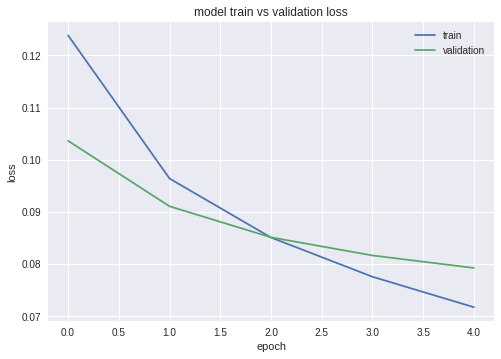

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()

In [0]:
q = modell.predict(test_token_headline_pad)

## Prediction array

In [0]:
q

array([[1.1083324e-02, 2.3481799e-02, 2.8991058e-02, ..., 2.4845782e-01,
        3.1081343e-04, 2.7765177e-02],
       [7.8535555e-03, 1.1899415e-02, 3.2255530e-02, ..., 2.5946528e-03,
        3.1891525e-02, 3.6882098e-05],
       [1.1424647e-03, 2.2941467e-03, 3.5789408e-02, ..., 1.4233821e-03,
        1.0853135e-03, 3.7920466e-03],
       ...,
       [2.1664423e-03, 9.6328725e-04, 6.3512614e-04, ..., 3.0868778e-03,
        9.0276822e-03, 5.4688292e-04],
       [2.1586707e-03, 1.2323627e-02, 3.0167948e-02, ..., 1.8550202e-03,
        1.8986005e-02, 7.4441778e-05],
       [9.1253773e-05, 2.1150348e-05, 9.9267963e-05, ..., 6.4892159e-04,
        6.2099571e-05, 9.9041790e-01]], dtype=float32)

In [0]:
np.argmax(q[0])

26

In [0]:
from sklearn import preprocessing
le = preprocessing.LabelEncoder()

In [0]:
le.fit(target_val.columns)

LabelEncoder()

In [0]:
test['encoded_caegory'] = test.category

In [0]:
test['encoded_caegory'] =le.transform(test['encoded_caegory'])

In [0]:
test.head(10)

,headline,short_description,category,encoded_caegory
3998,man dressed elsa 'frozen' pushes police wagon ...,"""if 15 minutes would like leverage meet adam r...",WEIRD NEWS,26
12620,kevin spacey reportedly dumped talent agency p...,caa polaris pr back away actor sexual miscondu...,ENTERTAINMENT,8
61205,bernie sanders briefly met pope francis vatica...,rome — bernie sanders privately met pope franc...,POLITICS,17
53931,mark hughes right bear arms. rob innocence.,death threats must stop.,BLACK VOICES,2
113125,music sweets perfect combo late night bakery,bonnie plays gorgeous fiddle nick works magic ...,ENTERTAINMENT,8
2451,trump court pick thinks planned parenthood 'ki...,wendy vitter refused tell senators still agree...,POLITICS,17
66800,celebs rock roll chic week's best beauty list,smoky eye makeup ftw,STYLE,22
56216,microsoft agrees acquire linkedin $26.2 billion,(reuters) - microsoft corp agreed buy linkedin...,BUSINESS,3
99566,first degree murder two degress separation mak...,although make routine stops read every story p...,CRIME,6
89940,priest fired seton hall chaplain comes gay,unavailable,RELIGION,19


In [0]:
np.argmax(q[9])

19

In [0]:
l =[]
for i in range(len(q)):
  l.append(np.argmax(q[i]))

In [0]:
l

In [0]:
predictions =pd.DataFrame()

In [0]:
 predictions.columns = ["predicted_encoded_category"]


In [0]:
test.head()

,headline,short_description,category,encoded_caegory
3998,man dressed elsa 'frozen' pushes police wagon ...,"""if 15 minutes would like leverage meet adam r...",WEIRD NEWS,26
12620,kevin spacey reportedly dumped talent agency p...,caa polaris pr back away actor sexual miscondu...,ENTERTAINMENT,8
61205,bernie sanders briefly met pope francis vatica...,rome — bernie sanders privately met pope franc...,POLITICS,17
53931,mark hughes right bear arms. rob innocence.,death threats must stop.,BLACK VOICES,2
113125,music sweets perfect combo late night bakery,bonnie plays gorgeous fiddle nick works magic ...,ENTERTAINMENT,8


In [0]:
predictions['headlines'] = test['headline']

In [0]:
predictions["predicted_encoded_category"] = l

In [0]:
predictions['predicted_category'] = le.inverse_transform(predictions["predicted_encoded_category"])

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/label.py:151: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


In [0]:
from sklearn.metrics import accuracy_score

## acuracy

In [0]:
accuracy_score(test['encoded_caegory'], predictions['predicted_encoded_category'])

0.5750860068805504

## Predictions

In [0]:
predictions

,headlines,predicted_encoded_category,predicted_category
3998,man dressed elsa 'frozen' pushes police wagon ...,26,WEIRD NEWS
12620,kevin spacey reportedly dumped talent agency p...,8,ENTERTAINMENT
61205,bernie sanders briefly met pope francis vatica...,19,RELIGION
53931,mark hughes right bear arms. rob innocence.,15,MEDIA
113125,music sweets perfect combo late night bakery,22,STYLE
2451,trump court pick thinks planned parenthood 'ki...,17,POLITICS
66800,celebs rock roll chic week's best beauty list,22,STYLE
56216,microsoft agrees acquire linkedin $26.2 billion,3,BUSINESS
99566,first degree murder two degress separation mak...,6,CRIME
89940,priest fired seton hall chaplain comes gay,19,RELIGION
